# Notebook5: Simulationen + GLM Exercises

## Aufgabe 1

Wir simulieren ein Würfelspiel bei dem es darum geht das Empire State
Building hochzulaufen. Wir wollen wissen wie wahrscheinlich es ist, 
dass man in 100 Würfen 
des Würfels die 60. Stufe des Empire State Buildings erreicht. 
Wir werden diese Sequenz mehrfach simulieren, um die 
Wahrscheinlichkeit zu berechnen, die 60. Stufe in 100 Versuchen 
mithilfe der Würfelspiel-Logik zu erreichen.

Regeln:

Für jede Zufallsweg-Sequenz werfen wir einen Würfel.<br />
Wir starten auf dem Boden, bei Stufe 0.<br />
Wenn der Wurf des Würfels eine 1 oder 2 ergibt, müssen wir eine Stufe 
hinuntergehen.<br />
Bei einem Wurf von 3, 4 oder 5 können wir eine Stufe nach oben gehen.<br />
Bei einem Wurf von 6 dürfen wir den Würfel erneut werfen und uns um die <br />
Anzahl der geworfenen Augen vorwärts bewegen.<br />
Es besteht eine geringe Chance, dass wir ungeschickt sind und die Treppe <br />
hinunterfallen (nach dem Hochgehen). In diesem Fall beginnen <br />
wir wieder bei Stufe 0.<br />
Die Anzahl der Stufen kann nicht negativ sein, und der niedrigste Wert <br />
ist immer 0, was dem Start auf dem Boden entspricht.<br />

Der Seed sollte 42 sein.

a) Simuliere die Walks.<br />
b) Plotte Walks mit lineplots. <br />
c) Plote die Verteilung der Walks am Ende des Spiels mit einem 
Histogram + KDE Plot.<br />
d) Schätze die Wahrscheinlichkeit, dass man am Ende des Spiels bei einer
Stufe >= 60 landet.

Parameter:<br />
Wuerfe = 100<br />
Iterationen = 100<br />
Fallwahrscheinlichkeit = 10 #in Prozent


In [3]:
# numpy and matplotlib imported, seed set

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(42)

In [2]:
# a)
# Parameter: 
Wuerfe = 100
Iterationen = 1000
Fallwahrscheinlichkeit = 1 #in Prozent

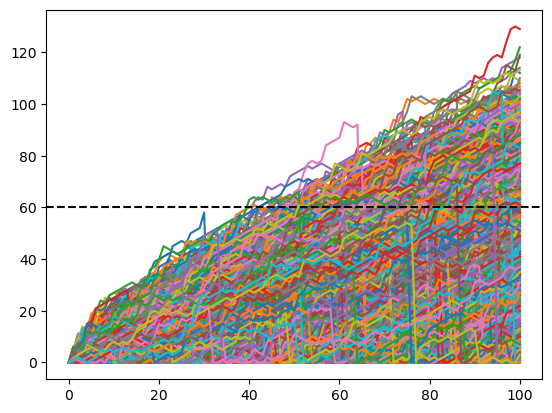

In [4]:
# Simulate random walk 500 times
all_walks = []
#iterationen für Wahrscheinlichkeitsschätzung:
for i in range(Iterationen) : 
    random_walk = [0] #startpunkt
    for x in range(Wuerfe) :
        step = random_walk[-1] #aktuelle Stufe
        dice = np.random.randint(1,7) #Augenzahl
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= (Fallwahrscheinlichkeit/100) :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)


# b)
#rows sind im moment noch walks => transponieren

aw = np.transpose(np.array(all_walks))

# Horizontal line
line_y = 60  # The y-value for the horizontal line
plt.plot(aw)
plt.axhline(y=line_y, color='black', linestyle='--')


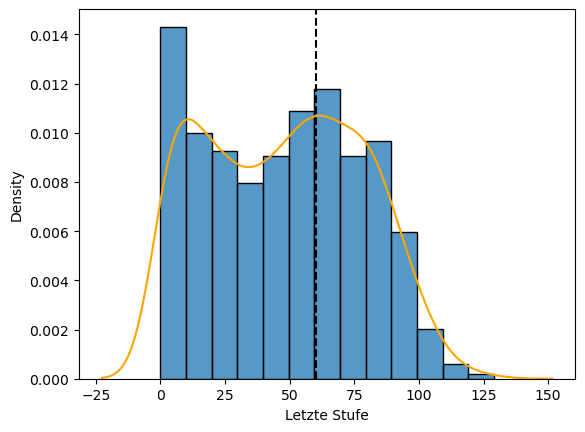

In [5]:
# c)
import seaborn as sns

#Letzte Stufe:
ends = aw[-1,:]

# Plot histogram of ends, display plot
# Erstelle figure und axis
fig, ax = plt.subplots() #Note, syntax: variable1, variable2 = 3, 5 

# Histogram plot mit seaborn

sns.histplot(ends, kde=False, stat='density')
sns.kdeplot(ends, color='orange')

# Axenbeschriftungen
ax.set_xlabel('Letzte Stufe')
line_x = 60  # The x-value for the vertical line
plt.axvline(x=line_x, color='black', linestyle='--')
# Display the plot
plt.show()

In [6]:
# d)
count=0
for i in ends:
    if i>=60:
        count=count+1
print("No. of times is:",count)
print("My odds are:",count/Iterationen)



No. of times is: 390
My odds are: 0.39


## Aufgabe 2

a) Simuliere einen Regressor (X) als Array von zufälligen Werten 
zwischen -2 und 2.

b) Simuliere einen Poisson-Prozess, bei dem die erwartete Anzahl der 
Ereignisse (lambda) von X abhängt. Verwende die Formel 
$$\log(\lambda) = 2 + 1,4*X$$
Halte die Anzahl der draws n flexibel.

b) Schätze die Poisson-Regression, indem du die Count-Daten (Y) als 
abhängige Variable und den Regressor (X) als unabhängige Variable 
verwendest. Füge eine Konstante hinzu, um die Regressionskoeffizienten 
zu schätzen.

c) Erstelle eine Pandas DataFrame mit den Werten von X und den 
entsprechenden Vorhersagen aus der Poisson-Regression.

d) Sortiere den DataFrame nach der Spalte "X".

e) Plotte den Regressor (X) gegen die Vorhersagen. Verwende Matplotlib, 
um ein Liniendiagramm zu erstellen. Beschrifte die Achsen und den 
Titel des Diagramms.

In [48]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# a) Simulieren des Regressors
# Setze den Zufallszahlengenerator auf einen 
# festen Wert für Reproduzierbarkeit
n = 100000
np.random.seed(42)  
X = np.random.uniform(-2, 2, n)

In [49]:
# b) Simulieren des Poisson-Prozesses
lambda_values = np.exp(2 + 1.4*X)  # Erwartungswert (Lambda) abhängig von X
Y = np.random.poisson(lambda_values)
Y

array([ 4, 97, 32, ..., 29,  7,  5])

In [71]:
# c) Schätzen der Poisson-Regression
# Füge eine Konstante hinzu, um den Regressionskoeffizienten zu schätzen
X = sm.add_constant(X)  
model = sm.GLM(Y, X, family=sm.families.Poisson()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               100000
Model:                            GLM   Df Residuals:                    99998
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.3802e+05
Date:                Tue, 04 Jul 2023   Deviance:                   1.0543e+05
Time:                        14:59:07   Pearson chi2:                 1.00e+05
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0007      0.001   1349.943      0.000       1.998       2.004
x1             1.4000      0.001   1378.732      0.000       1.398       1.402
==============================================================================
"""

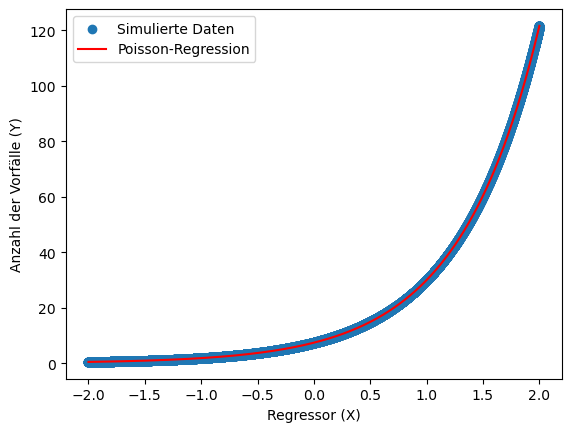

In [70]:
# d) Plotten der Datenpunkte und Regressionsgerade
df = pd.DataFrame({"X": X[:,1],
        "Predictions": model.predict()}).sort_values("X")

plt.scatter(df["X"], df["Predictions"],
        label='Simulierte Daten')
plt.plot(df["X"], df["Predictions"],
        color='red', label='Poisson-Regression')
plt.xlabel('Regressor (X)')
plt.ylabel('Anzahl der Vorfälle (Y)')
plt.legend()
plt.show()
